<a href="https://colab.research.google.com/github/TetaliVarshitha/WiseML/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class']
data = pd.read_csv("/content/drive/MyDrive/Machine Learning/Diabetes.csv", names=cols)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data['Class'].unique() ## Multiclass

array([1, 0])

<Figure size 1440x1440 with 0 Axes>

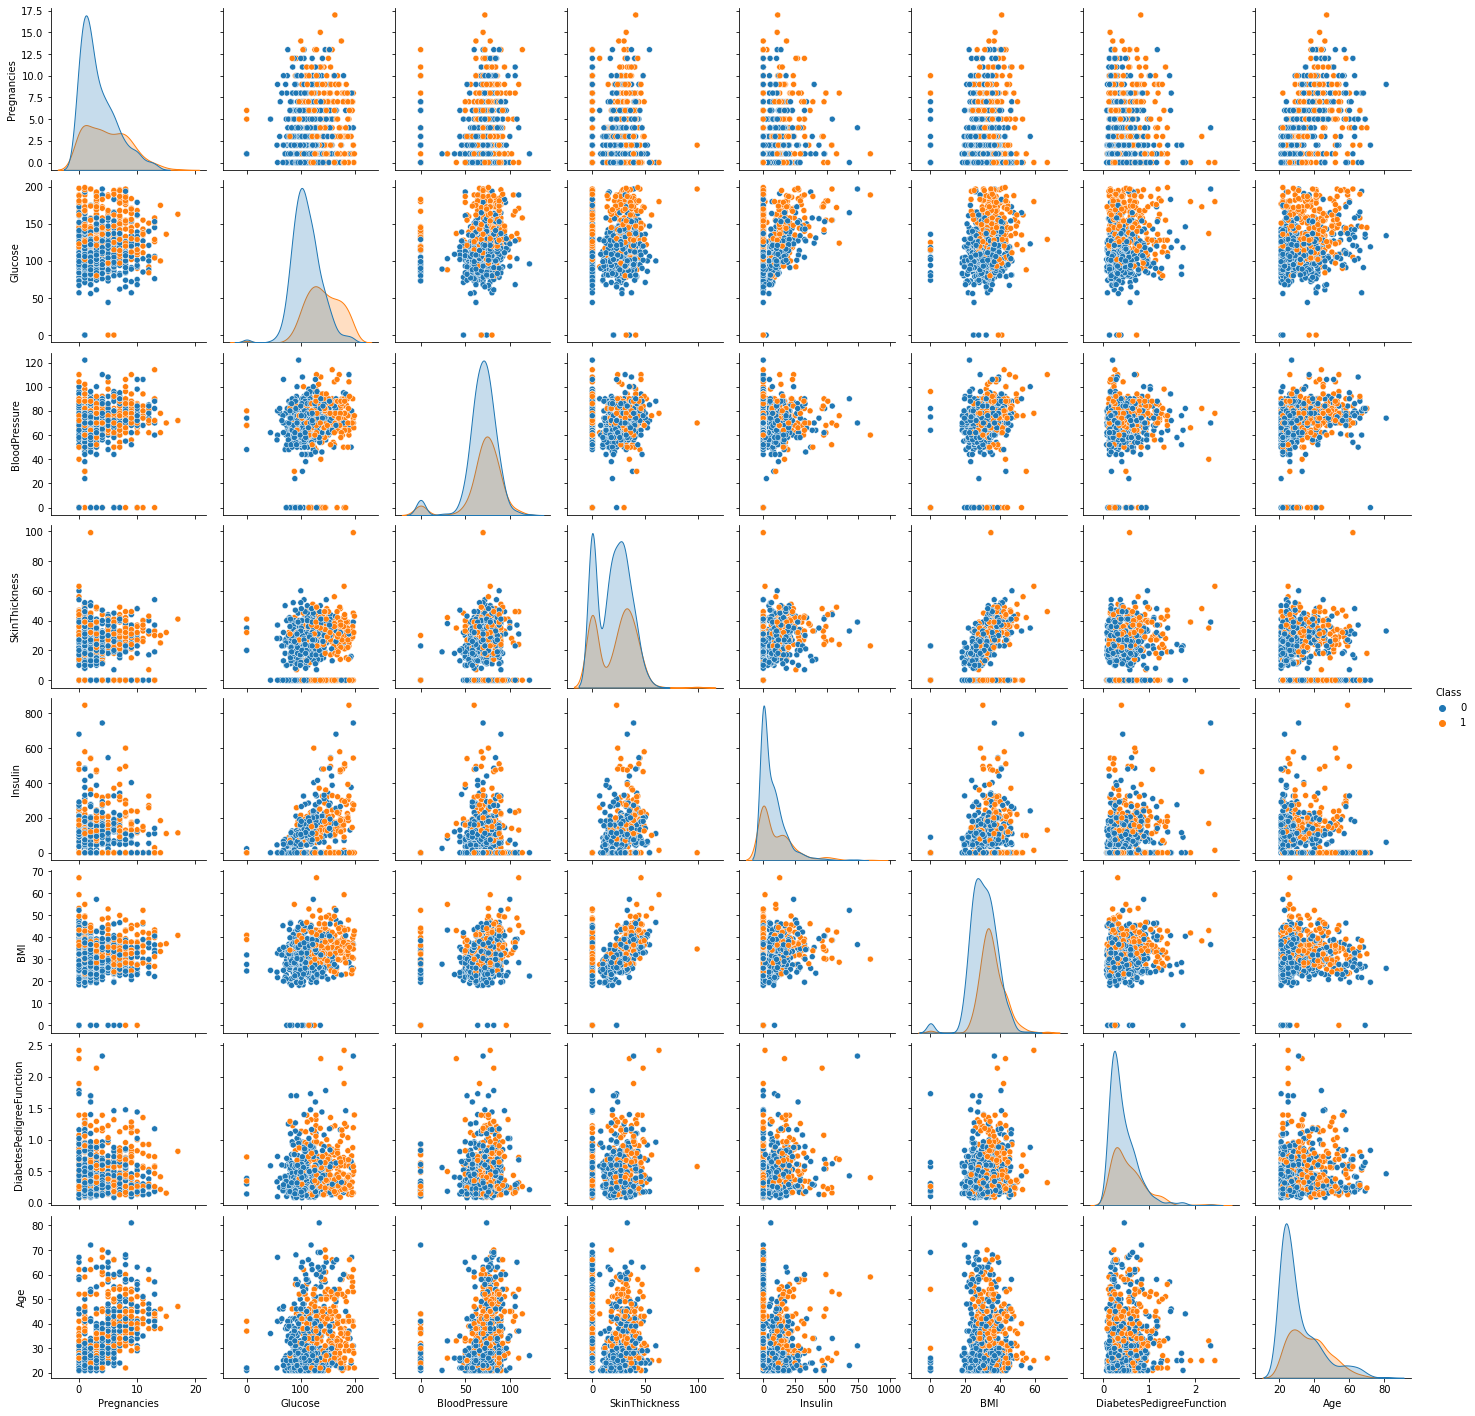

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(data, hue='Class')
plt.show()
plt.close()

In [ ]:
features = data.drop(['Class'], axis=1)
target = data['Class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=42)

**Logistic Regression:**

In [ ]:
logreg_model = LogisticRegression(max_iter=150, solver='lbfgs')
logreg_model.fit(X_train, y_train)

train_pred = logreg_model.predict(X_train)
test_pred =  logreg_model.predict(X_test)

In [ ]:
print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 78.156%
Testing Accuracy: 73.978%


**K-Nearest Neighbours:**

In [ ]:
k_range = range(1, 21)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    train_pred = knn_model.predict(X_train)
    test_pred =  knn_model.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

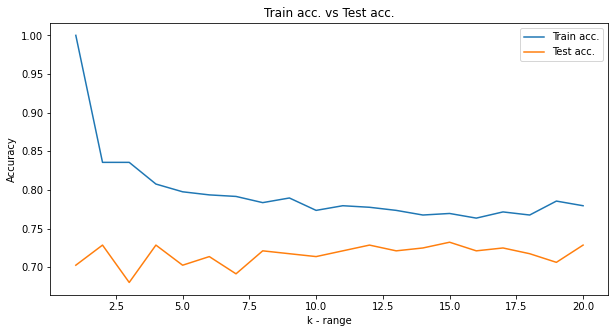

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)

train_pred = knn_model.predict(X_train)
test_pred =  knn_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 79.359%
Testing Accuracy: 71.375%


**DECISION TREES:**

**CART DT**

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 97.996%
Testing Accuracy: 71.004%


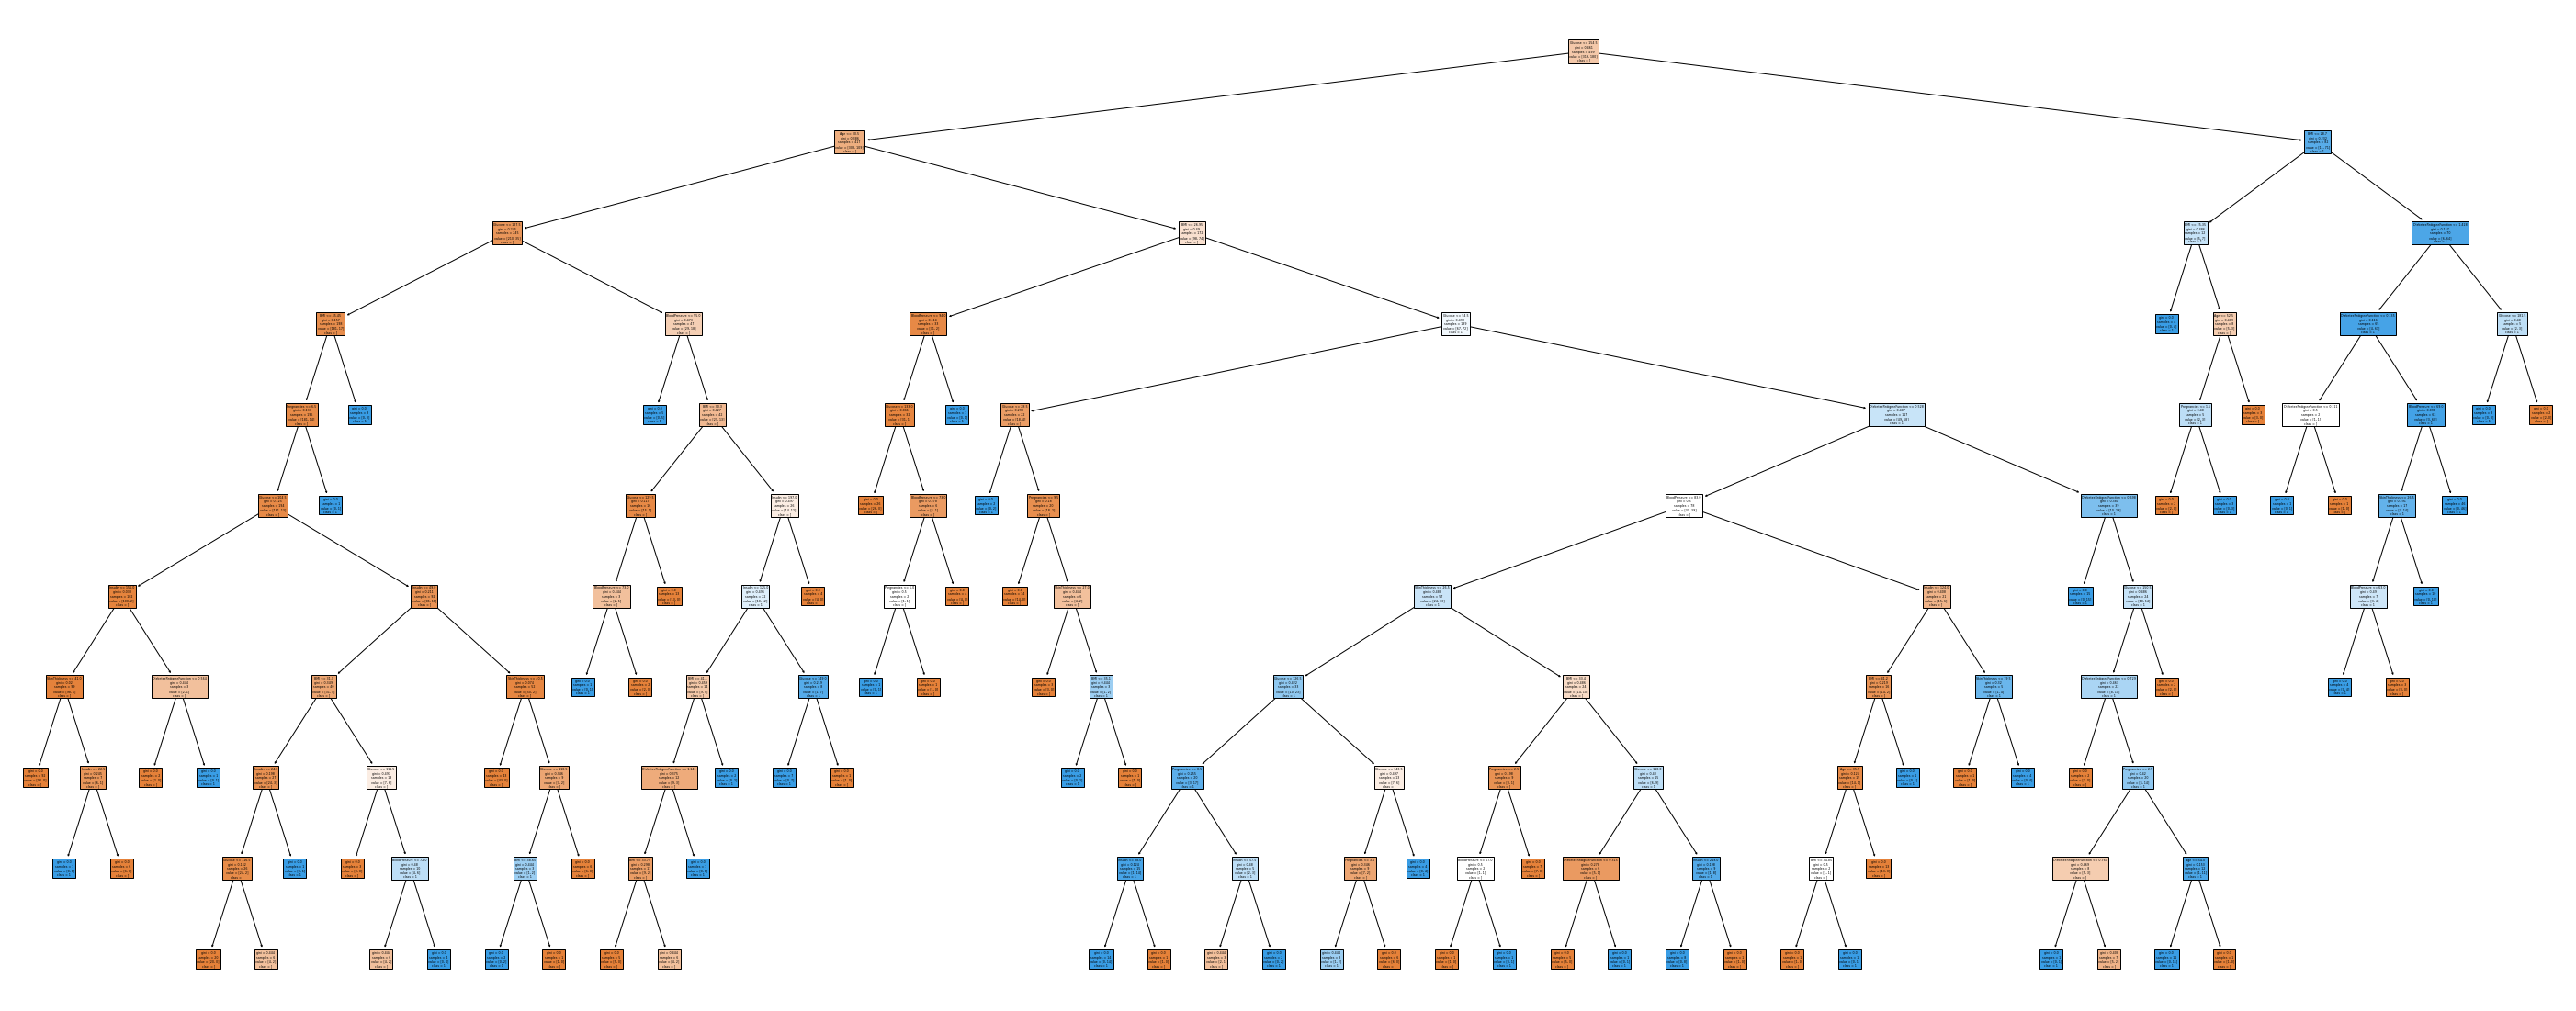

In [ ]:
fig = plt.figure(figsize=(50, 20))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=str(data['Class'].unique()))
plt.show()

**ID3 DT**

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 97.395%
Testing Accuracy: 75.093%


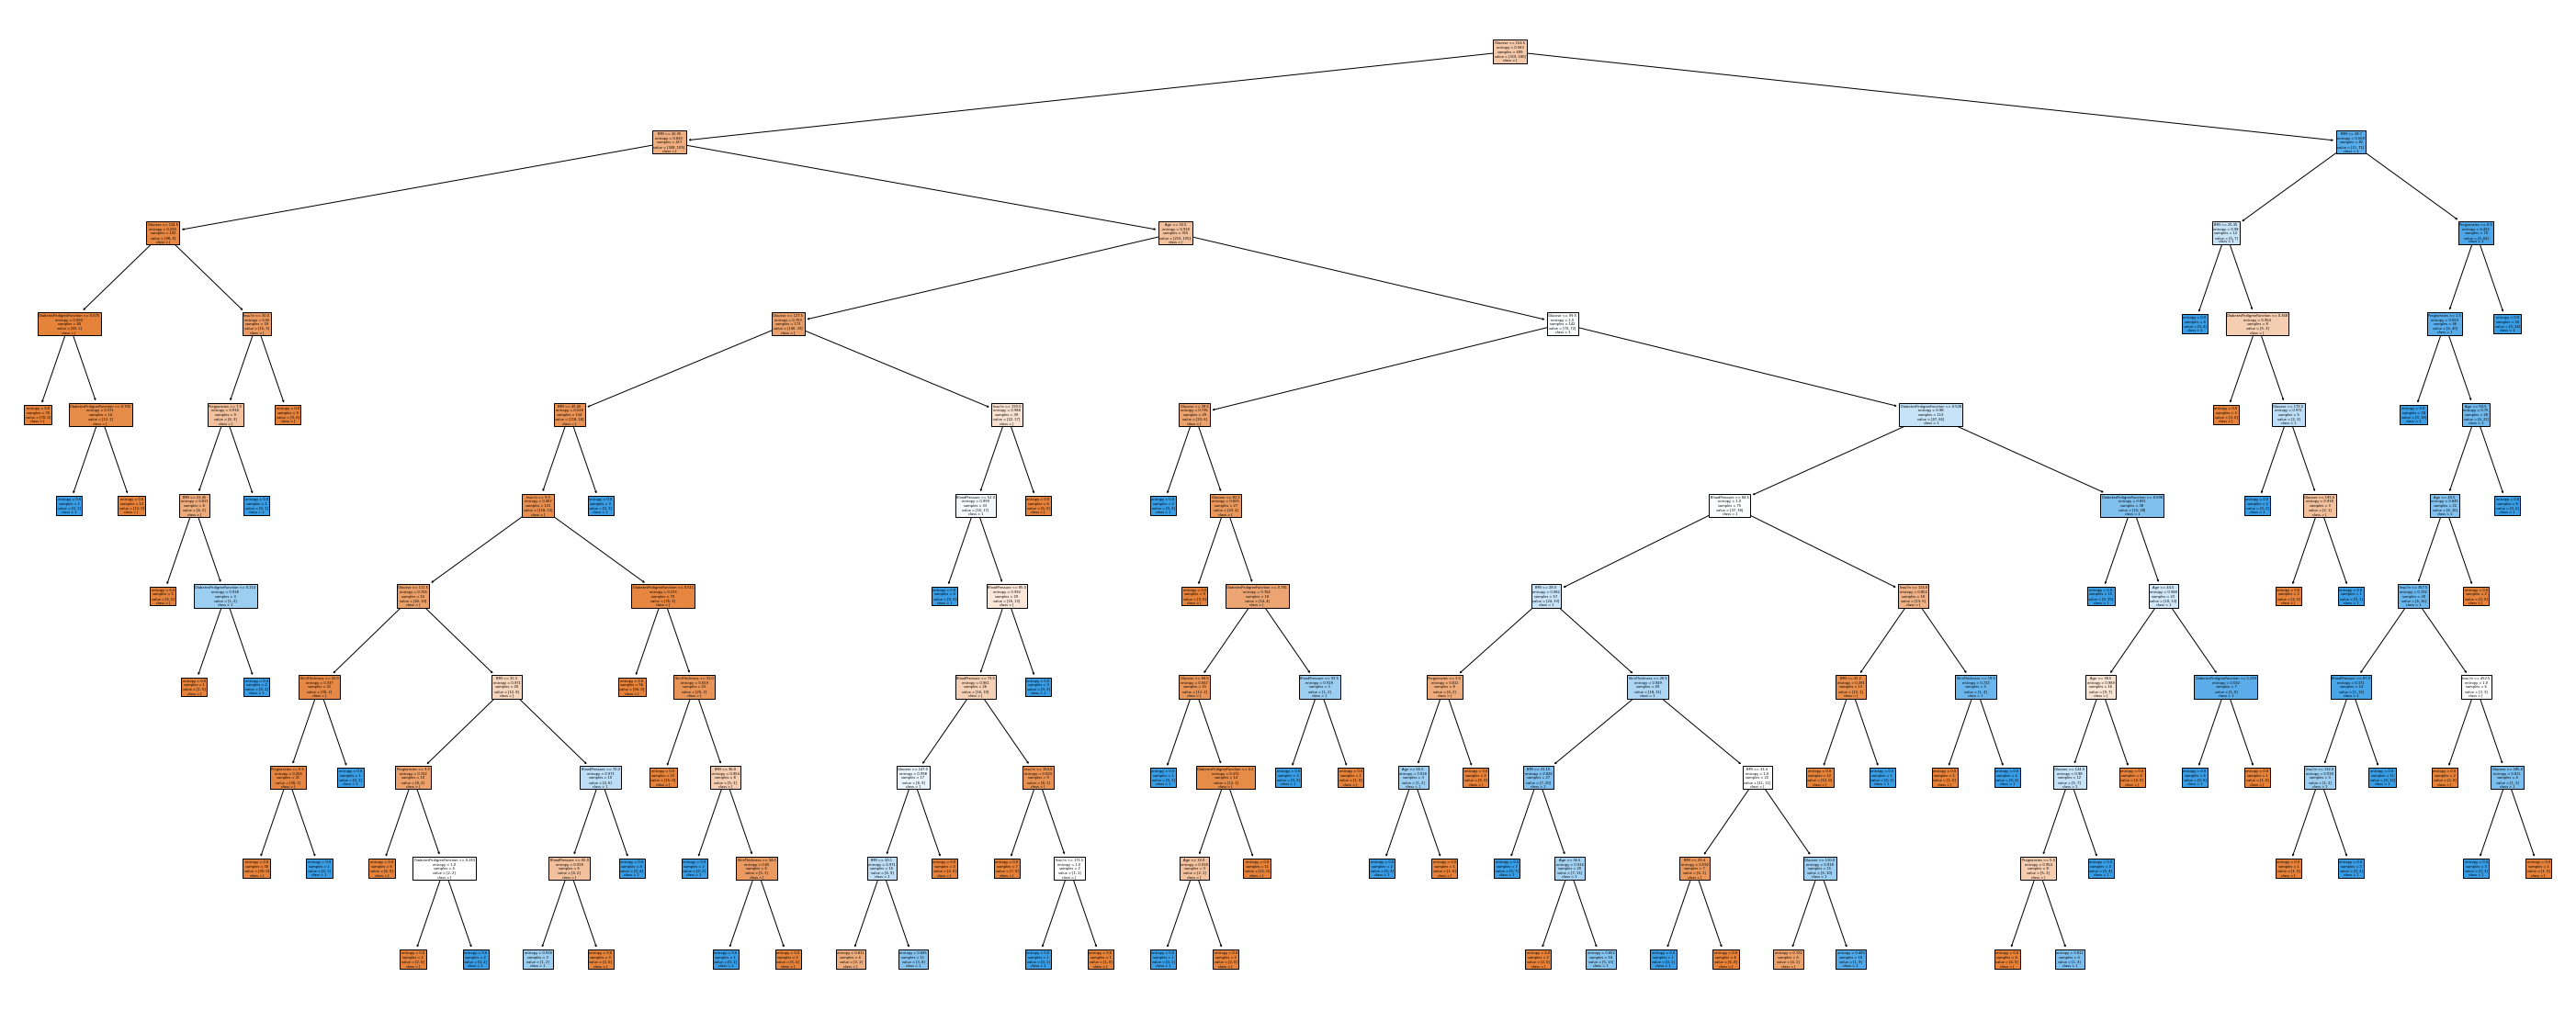

In [ ]:
fig = plt.figure(figsize=(50, 20))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=str(data['Class'].unique()))
plt.show()

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', splitter='random', max_features="sqrt", max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")


Training Accuracy: 85.571%
Testing Accuracy: 68.401%


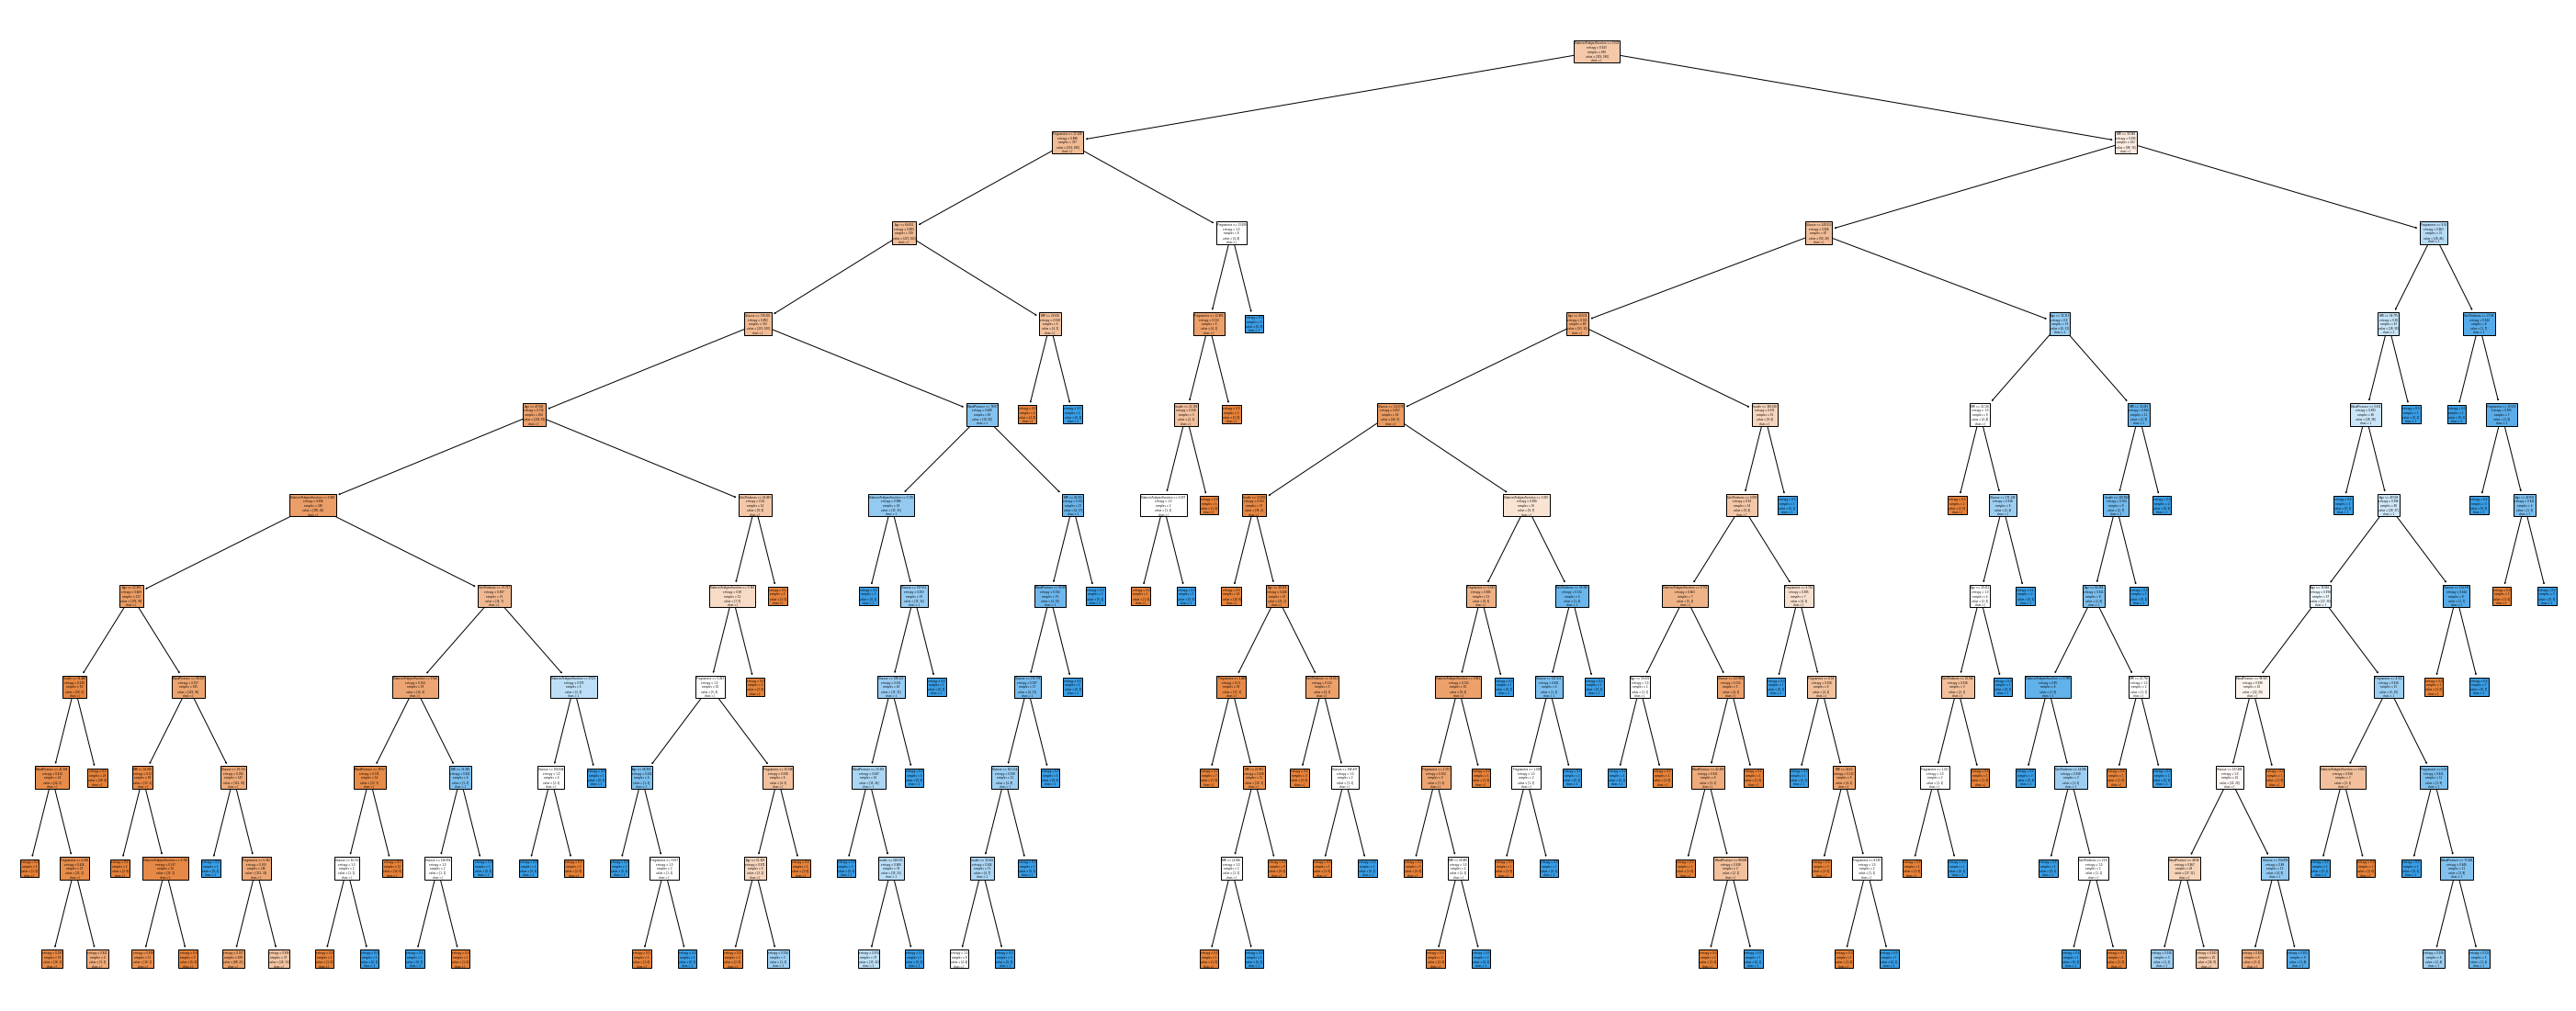

In [ ]:
fig = plt.figure(figsize=(50, 20))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=str(data['Class'].unique()))
plt.show()

**SVM:**

In [ ]:
data['Class'].unique()

array([1, 0])

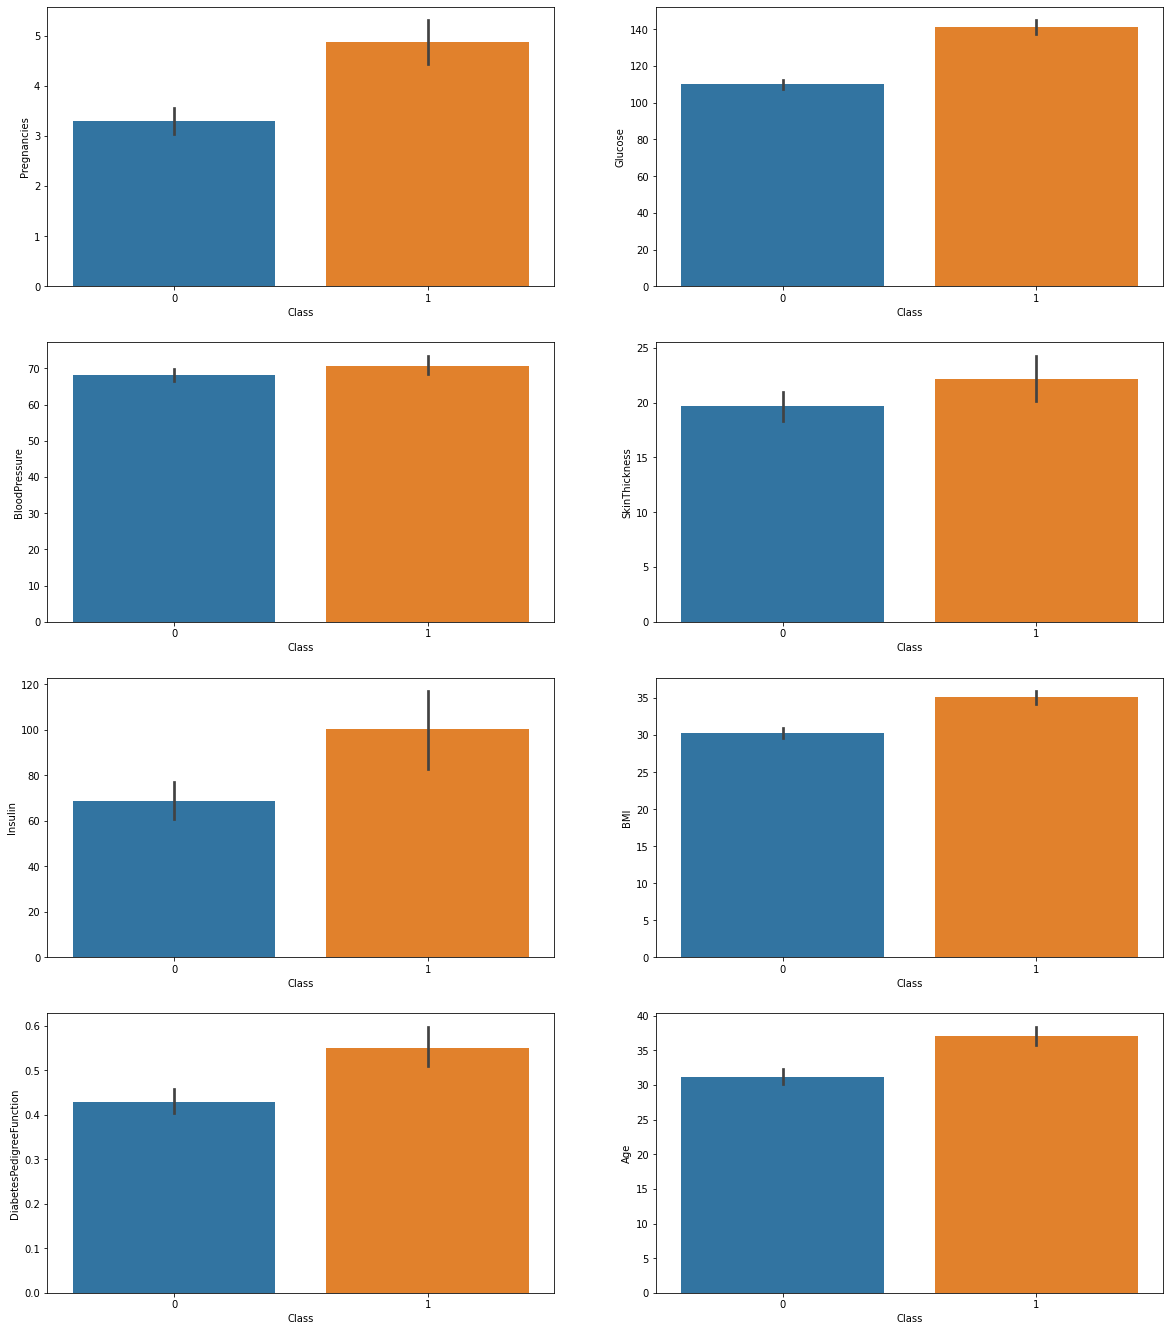

In [ ]:
def plot_bar(data, cols):
    fig = plt.figure(figsize=(20, 36))
    for loc, col in enumerate(cols):
        plt.subplot(6, 2, loc+1)
        sns.barplot(x='Class', y=col, data=data)
plot_bar(data, data.columns[:-1])
plt.show()

In [ ]:
arr = data.values
arr

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
features = data.drop(['Class'], axis=1)
target = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
X_train.shape

(614, 8)

In [ ]:
data.isnull().values.any()

False

In [ ]:
zero_not_allowed = ["Glucose","BloodPressure","SkinThickness"]

for column in zero_not_allowed:
    data[column] = data[column].replace(0, np.NaN)
    mean = int(data[column].mean(skipna = True))
    data[column] = data[column].replace(np.NaN, mean)

In [ ]:
x = data.iloc[:, :-2]
y = data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922


In [ ]:
confusion_matrix(y_test,y_pred)

array([[98,  9],
       [23, 24]])

In [ ]:
parameters = {
    'C': [0.05, 0.9, 1.2],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.05, 0.9, 1.2, 1.5]
    }

In [ ]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

train_pred = svc_model.predict(X_train)
test_pred = svc_model.predict(X_test)

print(f"Train accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Test accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Train accuracy: 75.896%
Test accuracy: 79.221%


**Performance Metrics:**

**Classification Accuracy:**

In [ ]:
X = arr[:, 0:8]
y = arr[:, 8]

k_fold = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')

In [ ]:
results.mean()

0.770762132604238

**Log Loss:**

In [ ]:
results = cross_val_score(model, X, y, cv=k_fold, scoring='neg_log_loss')

In [ ]:
results.mean()

-0.48887622007816284

**AUC Score:**

In [ ]:
results = cross_val_score(model, X, y, cv=k_fold, scoring='roc_auc')

In [ ]:
results.mean()

0.8285242811919705

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=700, shuffle=True)

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, pred)

array([[131,  23],
       [ 30,  47]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       154
         1.0       0.67      0.61      0.64        77

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [ ]:
roc_auc_score(y_test, pred)

0.7305194805194806

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

In [ ]:
fpr

array([0.        , 0.14935065, 1.        ])

In [ ]:
tpr

array([0.        , 0.61038961, 1.        ])

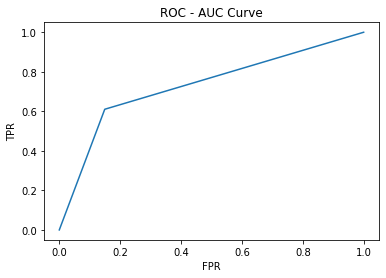

In [ ]:
plt.plot(fpr, tpr)
plt.title('ROC - AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**PCA:**

In [ ]:
featurenames = ['Pregnancies', 'Glucose',	'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',	'DiabetesPedigreeFunction', 'Age']
# separating features
features = data.loc[:,featurenames]

# separating target
labels = data.loc[:,'Class']

In [ ]:
features = StandardScaler().fit_transform(features)

In [ ]:
print(features)

[[ 0.63994726  0.86525364 -0.03198993 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20601255 -0.5283186  ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01595708 -0.69376149 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02243187 -0.03198993 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.14195434 -1.02464727 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.94299462 -0.19743282 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
pca = PCA(n_components=2)

pct = pca.fit_transform(features)

print(np.cumsum(pca.explained_variance_ratio_))
principal_df = pd.DataFrame(pct,columns=['pc1','pc2',])
display(principal_df)
finaldf = pd.concat([principal_df,labels],axis=1)

[0.27110375 0.46937726]


,pc1,pc2
0,1.435875,-0.802439
1,-1.555613,-0.203835
2,0.456377,-0.660738
3,-1.971682,0.316408
4,0.707316,3.851605
...,...,...
763,2.391586,-1.600198
764,-0.527330,0.288912
765,-0.656800,-0.537349
766,-0.438556,-0.393168


In [ ]:
print(principal_df)

          pc1       pc2
0    1.435875 -0.802439
1   -1.555613 -0.203835
2    0.456377 -0.660738
3   -1.971682  0.316408
4    0.707316  3.851605
..        ...       ...
763  2.391586 -1.600198
764 -0.527330  0.288912
765 -0.656800 -0.537349
766 -0.438556 -0.393168
767 -1.325980  0.266918

[768 rows x 2 columns]


In [ ]:
display(finaldf)

,pc1,pc2,Class
0,1.435875,-0.802439,zeroes
1,-1.555613,-0.203835,NaN
2,0.456377,-0.660738,zeroes
3,-1.971682,0.316408,NaN
4,0.707316,3.851605,NaN
...,...,...,...
763,2.391586,-1.600198,NaN
764,-0.527330,0.288912,ones
765,-0.656800,-0.537349,zeroes
766,-0.438556,-0.393168,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


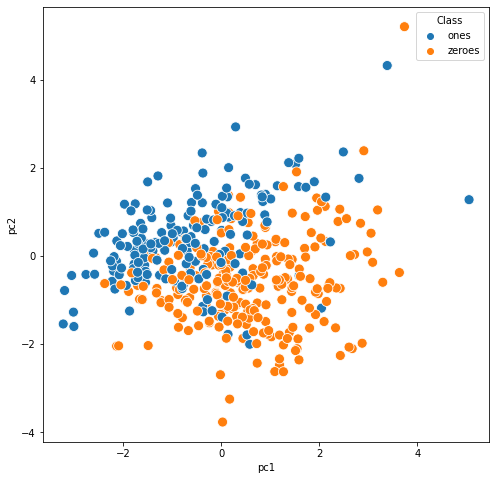

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot('pc1', 'pc2', hue='Class', data=finaldf, s=100)
plt.show()

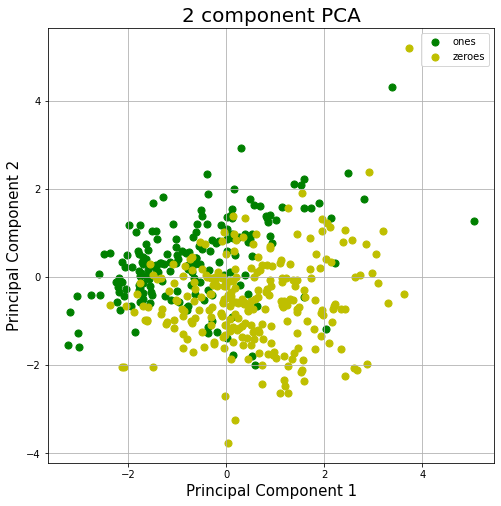

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['ones', 	'zeroes']
colors = ['g', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = labels == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**Artificial Neural Network:**

In [ ]:
train_df, test_df, train_df['Class'], test_df['Class'] = train_test_split(data.drop(['Class'], axis=1), data['Class'], test_size=0.2, random_state=0, shuffle=True)
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
603,7,150.0,78.0,29.0,126,35.2,0.692,54,1
118,4,97.0,60.0,23.0,0,28.2,0.443,22,0
247,0,165.0,90.0,33.0,680,52.3,0.427,23,0
157,1,109.0,56.0,21.0,135,25.2,0.833,23,0
468,8,120.0,72.0,29.0,0,30.0,0.183,38,1


In [ ]:
predictors = train_df.columns[:-1]
target = 'Class'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_df)
scaled_train

array([[0.41176471, 0.68831169, 0.55102041, ..., 0.26216909, 0.55      ,
        1.        ],
       [0.23529412, 0.34415584, 0.36734694, ..., 0.1558497 , 0.01666667,
        0.        ],
       [0.        , 0.78571429, 0.67346939, ..., 0.14901793, 0.03333333,
        0.        ],
       ...,
       [0.23529412, 0.32467532, 0.41836735, ..., 0.02988898, 0.        ,
        0.        ],
       [0.64705882, 0.26623377, 0.51020408, ..., 0.09479078, 0.23333333,
        0.        ],
       [0.29411765, 0.5974026 , 0.59183673, ..., 0.23996584, 0.8       ,
        0.        ]])

In [ ]:
scaled_train_df = pd.DataFrame(scaled_train, columns=train_df.columns.values)
scaled_train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,0.411765,0.688312,0.551020,0.239130,0.148936,0.524590,0.262169,0.550000,1.0
1,0.235294,0.344156,0.367347,0.173913,0.000000,0.420268,0.155850,0.016667,0.0
2,0.000000,0.785714,0.673469,0.282609,0.803783,0.779434,0.149018,0.033333,0.0
3,0.058824,0.422078,0.326531,0.152174,0.159574,0.375559,0.322374,0.033333,0.0
4,0.470588,0.493506,0.489796,0.239130,0.000000,0.447094,0.044833,0.283333,1.0
...,...,...,...,...,...,...,...,...,...
609,0.588235,0.370130,0.530612,0.445652,0.212766,0.490313,0.039710,0.700000,0.0
610,0.411765,0.746753,0.428571,0.239130,0.000000,0.453055,0.130231,0.250000,1.0
611,0.235294,0.324675,0.418367,0.163043,0.000000,0.368107,0.029889,0.000000,0.0
612,0.647059,0.266234,0.510204,0.239130,0.000000,0.448584,0.094791,0.233333,0.0


**Model Building:**

In [ ]:
# Sequential Layer
model = Sequential()

In [ ]:
# Hidden layers
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))

In [ ]:
# Output Layer
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
X = scaled_train_df.drop(target, axis=1).values
y = scaled_train_df[[target]].values

In [ ]:
# Train the model

model.fit(
    x=X,
    y=y,
    epochs=100,
    shuffle=True,
    verbose=2,
)

Epoch 1/100
20/20 - 1s - loss: 0.2310
Epoch 2/100
20/20 - 0s - loss: 0.1920
Epoch 3/100
20/20 - 0s - loss: 0.1804
Epoch 4/100
20/20 - 0s - loss: 0.1721
Epoch 5/100
20/20 - 0s - loss: 0.1654
Epoch 6/100
20/20 - 0s - loss: 0.1594
Epoch 7/100
20/20 - 0s - loss: 0.1600
Epoch 8/100
20/20 - 0s - loss: 0.1552
Epoch 9/100
20/20 - 0s - loss: 0.1561
Epoch 10/100
20/20 - 0s - loss: 0.1512
Epoch 11/100
20/20 - 0s - loss: 0.1486
Epoch 12/100
20/20 - 0s - loss: 0.1513
Epoch 13/100
20/20 - 0s - loss: 0.1533
Epoch 14/100
20/20 - 0s - loss: 0.1445
Epoch 15/100
20/20 - 0s - loss: 0.1451
Epoch 16/100
20/20 - 0s - loss: 0.1447
Epoch 17/100
20/20 - 0s - loss: 0.1451
Epoch 18/100
20/20 - 0s - loss: 0.1432
Epoch 19/100
20/20 - 0s - loss: 0.1427
Epoch 20/100
20/20 - 0s - loss: 0.1421
Epoch 21/100
20/20 - 0s - loss: 0.1497
Epoch 22/100
20/20 - 0s - loss: 0.1422
Epoch 23/100
20/20 - 0s - loss: 0.1405
Epoch 24/100
20/20 - 0s - loss: 0.1413
Epoch 25/100
20/20 - 0s - loss: 0.1402
Epoch 26/100
20/20 - 0s - loss: 0.

In [ ]:
def scaler_inverse_transform(value):
    scaled_prediction = value
    scaled_prediction -= added_factor
    return scaled_prediction / multiply_factor

In [ ]:
multiply_factor = scaler.scale_[8]
added_factor = scaler.min_[8]

In [ ]:
scaler_inverse_transform(y[:1][0][0])

1.0

In [ ]:
prediction = model.predict(X[:])
prediction

array([[ 9.18481350e-01],
       [ 1.89532399e-01],
       [ 1.09283976e-01],
       [ 1.64150044e-01],
       [ 5.57218432e-01],
       [ 1.20685232e+00],
       [ 7.69864202e-01],
       [ 9.54564273e-01],
       [ 1.41000226e-01],
       [ 7.20368326e-02],
       [ 7.54523754e-01],
       [ 3.58131707e-01],
       [ 1.38908803e-01],
       [ 1.70916796e-01],
       [ 3.31425488e-01],
       [ 4.82567191e-01],
       [ 5.06061353e-02],
       [ 2.07587242e-01],
       [ 4.99758154e-01],
       [ 7.96380043e-01],
       [ 5.33273995e-01],
       [ 2.41438989e-02],
       [ 2.09907815e-01],
       [-6.80626482e-02],
       [ 1.63806424e-01],
       [ 8.51856992e-02],
       [ 2.69759417e-01],
       [ 9.93319988e-01],
       [ 1.26078635e-01],
       [ 1.03655994e+00],
       [ 8.61884475e-01],
       [ 3.76219600e-02],
       [ 7.05697119e-01],
       [ 4.92854685e-01],
       [ 6.42546833e-01],
       [ 1.76601317e-02],
       [ 5.33154070e-01],
       [ 8.23975429e-02],
       [ 2.2

In [ ]:
for idx in range(404):    
    print(f"Actual Price: {scaler_inverse_transform(y[idx][0])* 1000:.2f}$")
    print(f"Predicted Price: {scaler_inverse_transform(prediction[idx][0])* 1000:.2f}$")
    print("-"*30)

Actual Price: 1000.00$
Predicted Price: 918.48$
------------------------------
Actual Price: 0.00$
Predicted Price: 189.53$
------------------------------
Actual Price: 0.00$
Predicted Price: 109.28$
------------------------------
Actual Price: 0.00$
Predicted Price: 164.15$
------------------------------
Actual Price: 1000.00$
Predicted Price: 557.22$
------------------------------
Actual Price: 1000.00$
Predicted Price: 1206.85$
------------------------------
Actual Price: 1000.00$
Predicted Price: 769.86$
------------------------------
Actual Price: 1000.00$
Predicted Price: 954.56$
------------------------------
Actual Price: 0.00$
Predicted Price: 141.00$
------------------------------
Actual Price: 0.00$
Predicted Price: 72.04$
------------------------------
Actual Price: 0.00$
Predicted Price: 754.52$
------------------------------
Actual Price: 1000.00$
Predicted Price: 358.13$
------------------------------
Actual Price: 0.00$
Predicted Price: 138.91$
-------------------------